#### [ 공공데이터 분석 - 온도데이터 ]
- 데이터 : 기상청 데이터

[1] 모듈 로딩 <hr>

In [149]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [150]:
daeguDF = pd.read_csv('../data/대구_기온_20010727_20251110.csv',skiprows=7)
daeguDF

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2001-07-27,143,28.3,25.9,32.6
1,\t2001-07-28,143,29.6,26.6,33.2
2,\t2001-07-29,143,31.0,26.3,34.8
3,\t2001-07-30,143,29.4,27.3,33.7
4,\t2001-07-31,143,29.0,26.9,34.0
...,...,...,...,...,...
8867,\t2025-11-05,143,11.8,5.4,20.2
8868,\t2025-11-06,143,12.8,6.7,21.2
8869,\t2025-11-07,143,13.1,7.7,20.6
8870,\t2025-11-08,143,12.9,7.8,18.3


In [151]:
daeguDF.info()
daeguDF.head(), daeguDF.tail()
# daeguDF['최고기온(℃)'] = daeguDF['최고기온(℃)'].astype('float')

## 날짜 컬럼 앞에 \t 지우기
## 불필요한 컬럼 지우기 (지점 컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8872 entries, 0 to 8871
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       8872 non-null   object 
 1   지점       8872 non-null   int64  
 2   평균기온(℃)  8871 non-null   float64
 3   최저기온(℃)  8872 non-null   float64
 4   최고기온(℃)  8870 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 346.7+ KB


(             날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
 0  \t2001-07-27  143     28.3     25.9     32.6
 1  \t2001-07-28  143     29.6     26.6     33.2
 2  \t2001-07-29  143     31.0     26.3     34.8
 3  \t2001-07-30  143     29.4     27.3     33.7
 4  \t2001-07-31  143     29.0     26.9     34.0,
                 날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
 8867  \t2025-11-05  143     11.8      5.4     20.2
 8868  \t2025-11-06  143     12.8      6.7     21.2
 8869  \t2025-11-07  143     13.1      7.7     20.6
 8870  \t2025-11-08  143     12.9      7.8     18.3
 8871  \t2025-11-09  143     14.6     11.1     19.3)

[3] 기본 전처리 => 불필요 컬럼과 데이터 삭제 <hr>

In [152]:
## 지점 컬럼 대구 코드값 불필요한 컬럼 제거 : drop(axis=1 또는 'columns')
## 방법1
# daeguDF.drop('지점', axis='columns', inplace=True)
## 방법2
daeguDF.drop(columns='지점', inplace=True)
daeguDF


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2001-07-27,28.3,25.9,32.6
1,\t2001-07-28,29.6,26.6,33.2
2,\t2001-07-29,31.0,26.3,34.8
3,\t2001-07-30,29.4,27.3,33.7
4,\t2001-07-31,29.0,26.9,34.0
...,...,...,...,...
8867,\t2025-11-05,11.8,5.4,20.2
8868,\t2025-11-06,12.8,6.7,21.2
8869,\t2025-11-07,13.1,7.7,20.6
8870,\t2025-11-08,12.9,7.8,18.3


In [153]:
## 날짜 컬럼에 앞에 붙은 '\t' 제거 => 날짜 컬럼 타입 object로 str임
## 접근자 str 사용
## 방법1
daeguDF.날짜 = daeguDF.날짜.str.strip('\t')

## 방법2
# daeguDF.날짜 = daeguDF.날짜.str.replace('\t','')
daeguDF

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2001-07-27,28.3,25.9,32.6
1,2001-07-28,29.6,26.6,33.2
2,2001-07-29,31.0,26.3,34.8
3,2001-07-30,29.4,27.3,33.7
4,2001-07-31,29.0,26.9,34.0
...,...,...,...,...
8867,2025-11-05,11.8,5.4,20.2
8868,2025-11-06,12.8,6.7,21.2
8869,2025-11-07,13.1,7.7,20.6
8870,2025-11-08,12.9,7.8,18.3


[3] 세부 전처리 <hr>
- 결측치/중복값/이상치

In [154]:
## --------------------------------
## 결측치 체크
## --------------------------------
daeguDF.isna().sum()


날짜         0
평균기온(℃)    1
최저기온(℃)    0
최고기온(℃)    2
dtype: int64

In [155]:
## 결측치 존재 행 추출 => 필터링
## 방법 1
daeguDF[(daeguDF['평균기온(℃)'].isna() == True ) | (daeguDF['최고기온(℃)'].isna() == True ) ] 

## 방법 2
## any() : 행/열방향으로 원소가 1개 이상 True면 True가 됨
## all() : 행/열방향으로 원소가 모두 True면 True
## ★ 주의 ★
## => 행단위일경우 axis=1 : 행을 구성하는 모든 원소 즉, 모든 컬럼값을 확인
## => 열단위일경우 axis=0 : 열을 구성하는 모든 원소 즉, 모든 행의 값들 확인
daeguDF[daeguDF.isna().any(axis=1)]     ## any는 한개 이상만 True여도 출력함

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
4448,2013-09-30,NaN,20.1,NaN
8244,2024-02-21,5.1,3.6,NaN


In [156]:
# 데이터의 특성 즉, 기온 무작위성 x ->  같은 컬럼의 값들이 서로 연결성
# 삭제하지 않고 채우기 -> 이전/이후 값들의 평균값으로 채우기 
msDF = daeguDF[daeguDF.isna().any(axis=1)]

for idx in msDF.index:
    print(idx)
    print(daeguDF.iloc[idx].to_list())
    print(daeguDF.iloc[idx-1].to_list())
    print(daeguDF.iloc[idx+1].to_list())
    print(daeguDF.iloc[idx-1:idx+2].mean(numeric_only = True))
    break

daeguDF

4448
['2013-09-30', np.float64(nan), np.float64(20.1), np.float64(nan)]
['2013-09-29', np.float64(20.3), np.float64(18.9), np.float64(22.3)]
['2013-10-01', np.float64(22.7), np.float64(19.8), np.float64(28.2)]
평균기온(℃)    21.50
최저기온(℃)    19.60
최고기온(℃)    25.25
dtype: float64


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2001-07-27,28.3,25.9,32.6
1,2001-07-28,29.6,26.6,33.2
2,2001-07-29,31.0,26.3,34.8
3,2001-07-30,29.4,27.3,33.7
4,2001-07-31,29.0,26.9,34.0
...,...,...,...,...
8867,2025-11-05,11.8,5.4,20.2
8868,2025-11-06,12.8,6.7,21.2
8869,2025-11-07,13.1,7.7,20.6
8870,2025-11-08,12.9,7.8,18.3


In [157]:
daeguDF.iloc[5021][daeguDF.iloc[8817].isna()].index

Index([], dtype='object')

In [158]:
for idx in msDF.index:
    print(idx)
    cols = daeguDF.iloc[idx][daeguDF.iloc[idx].isna()].index

    ## 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균 : {컬럼명:평균값,..}
    fill_values = daeguDF[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    print(fill_values)
    msDF.loc[idx] = daeguDF.iloc[idx].fillna(fill_values)

msDF.isna().sum()

4448
{'평균기온(℃)': 21.5, '최고기온(℃)': 25.25}
8244
{'최고기온(℃)': 8.75}


날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [159]:
## --------------------------------
## 중복값 체크 : 기온 데이터는 중복 발생 가능. 유지
## --------------------------------
## 내가 푼 방법
display(daeguDF.iloc[:, 1:].duplicated().sum())  # 중복값 60개
daeguDF[daeguDF.iloc[:, 1:].duplicated()]

## 선생님 방법
daegu = daeguDF[daeguDF.duplicated(subset=daeguDF.columns[1:], keep=False)] ## keep False는 모든 중복값을 True로 줌 -> 전체 중복값 확인할 수 있음
daegu.sort_values(by=['평균기온(℃)'])

np.int64(60)

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
1266,2005-01-13,-1.2,-3.9,2.5
4879,2014-12-05,-1.2,-3.9,2.5
1666,2006-02-17,-1.0,-3.7,2.7
8612,2025-02-23,-1.0,-3.7,2.7
6392,2019-01-26,-0.3,-3.5,4.6
...,...,...,...,...
3280,2010-07-20,29.1,24.8,34.2
4394,2013-08-07,30.0,23.8,36.2
1428,2005-06-24,30.0,23.8,36.2
4366,2013-07-10,30.7,26.2,35.9


In [160]:
## 이상치 체크
import sys
sys.path.append(r'C:\Users\qjadl\Desktop\KDT10\EX_DATA_ANALYSYS\Utils')
import datautil as du

## 수치컬럼의 이상치 검사
numeric_cols = daeguDF.select_dtypes(include='number') ## 숫자인 열만 출력
du.get_outlier_records(daeguDF, numeric_cols)

# du.get_outlier_records(daeguDF, daeguDF.columns[1:])

[]

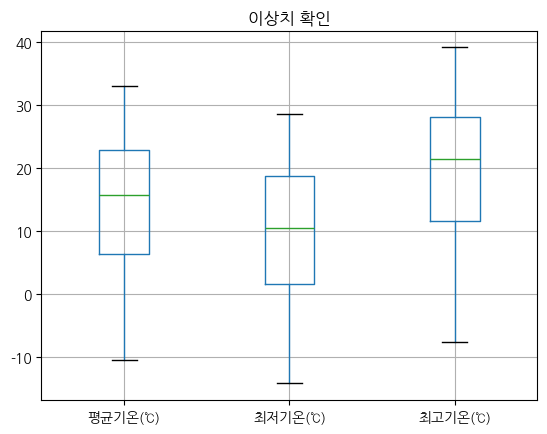

In [161]:
## 박스 플롯으로 이상치 시각화
daeguDF.boxplot()

plt.title('이상치 확인')
plt.show()

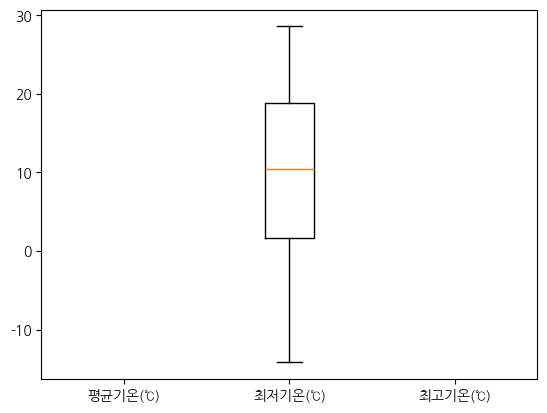

In [162]:
plt.boxplot(daeguDF[daeguDF.columns[1:]]) 
plt.xticks([1,2,3], daeguDF.columns[1:])
plt.show()

### [4] 탐색적분석 EDA <hr>

In [163]:
# 날짜 컬럼 : object -> str 이지만 날짜를 의미 : datetime64[ns]
daeguDF.columns
daeguDF.날짜 = pd.to_datetime(daeguDF.날짜)
# print(f'{daeguDF.날짜[0]} / {type(daeguDF.날짜[0])}')
daeguDF
# # 타입 체크
# daeguDF.info()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2001-07-27,28.3,25.9,32.6
1,2001-07-28,29.6,26.6,33.2
2,2001-07-29,31.0,26.3,34.8
3,2001-07-30,29.4,27.3,33.7
4,2001-07-31,29.0,26.9,34.0
...,...,...,...,...
8867,2025-11-05,11.8,5.4,20.2
8868,2025-11-06,12.8,6.7,21.2
8869,2025-11-07,13.1,7.7,20.6
8870,2025-11-08,12.9,7.8,18.3


In [164]:
# ## 전체적인 대구시의 2001.07.27 ~ 2025.11.09까지 기온변화
# ## => 시간에 따른 흐름 : 선그래프
# ## => x축 : 날짜 , y축 평균/최저/최고

# plt.figure(figsize=(12,4))
# plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
# plt.plot(daeguDF['날짜'], daeguDF['최저기온(℃)'])
# plt.plot(daeguDF['날짜'], daeguDF['최고기온(℃)'])
# plt.xlabel('기온') 
# plt.ylabel('년도')
# plt.title('2001 ~ 2025까지 대구 날씨')
# plt.tight_layout()
# plt.xticks(daeguDF['날짜'], rotation=90)
# plt.show()

In [165]:
## ----------------------------------------------------------------
## 날짜 컬럼 일단위 ==> 주기 (주 W, 월 M, 분기 Q, 년도 Y)
## ----------------------------------------------------------------
## Period 배열 만들기
pr_m = pd.period_range( start=daeguDF['날짜'].iloc[0],          # 날짜 범위의 시작
                        end=daeguDF['날짜'].iloc[-1],           # 날짜 범위의 끝
                        freq='Y')                               # 주기설정

print(pr_m, pr_m.shape, range(1, pr_m.shape[0]+1))

daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])

PeriodIndex(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
             '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
             '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
             '2025'],
            dtype='period[Y-DEC]') (25,) range(1, 26)


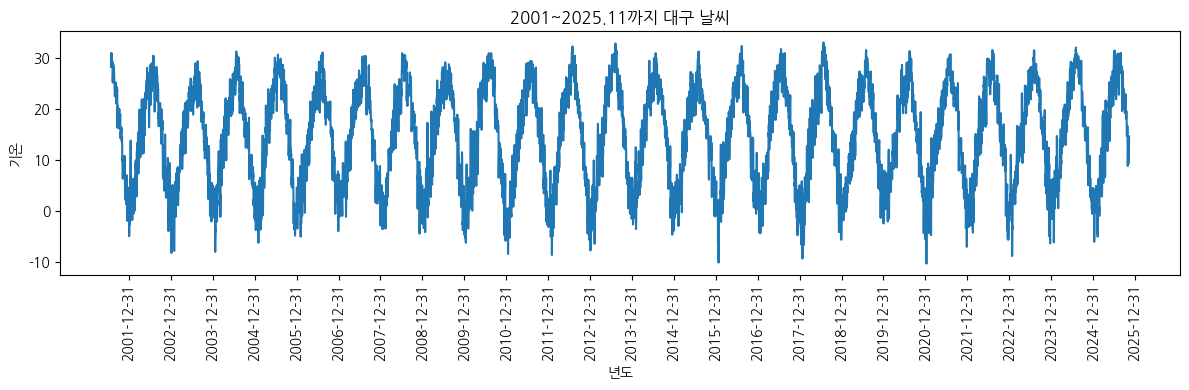

In [166]:
## 전체적인 대구시의 2000.1.1 ~ 2025.11.9까지 기온변화
## => 시간에 따른 흐름 : 선그래프
## => X축 : 날짜    Y축 : 기온 평균/최저/최고
plt.figure(figsize=(12,4))
plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
plt.ylabel('기온')
plt.xlabel('년도')
plt.xticks(pr_m, rotation=90)
plt.title('2001~2025.11까지 대구 날씨')
plt.tight_layout()
plt.show()

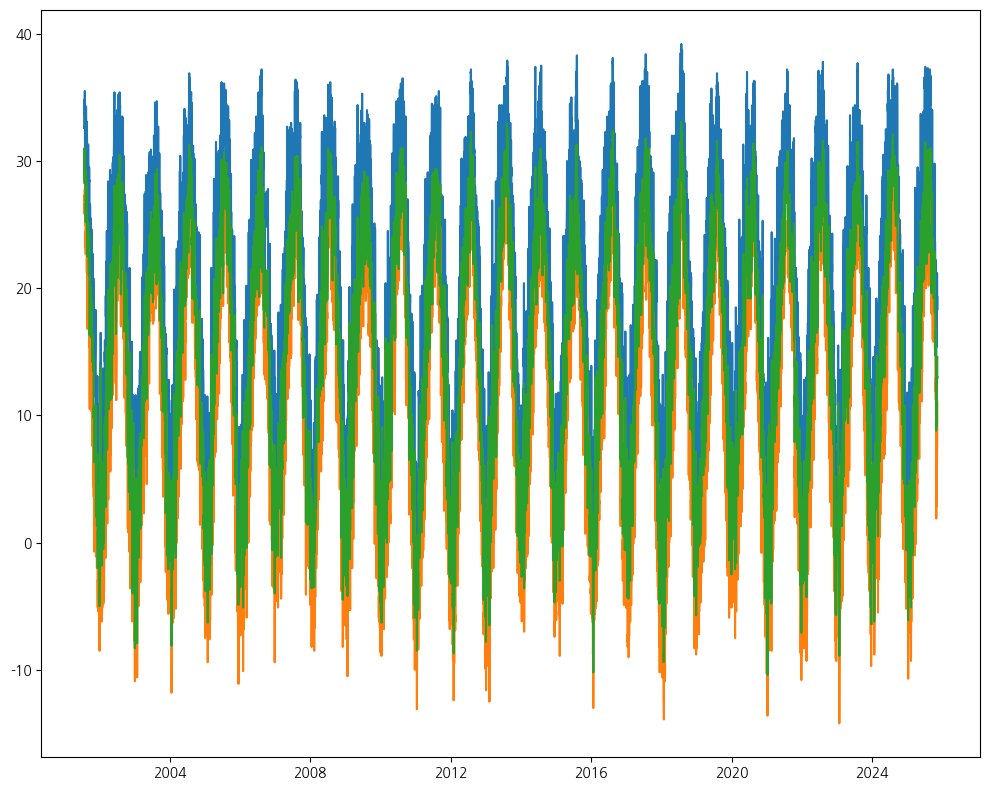

In [167]:
# [문제] 2000~2025년도 최고온도/최저온도/평균온도 변화 시각화
## bar 사용
## 2001 / 2002 / .. / 2025 -> .max()
plt.figure(figsize=(10,8))
plt.plot(daeguDF['날짜'],daeguDF['최고기온(℃)'])
plt.plot(daeguDF['날짜'],daeguDF['최저기온(℃)'])
plt.plot(daeguDF['날짜'],daeguDF['평균기온(℃)'])
plt.tight_layout()

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8872 entries, 0 to 8871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       8872 non-null   datetime64[ns]
 1   평균기온(℃)  8871 non-null   float64       
 2   최저기온(℃)  8872 non-null   float64       
 3   최고기온(℃)  8870 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 277.4 KB


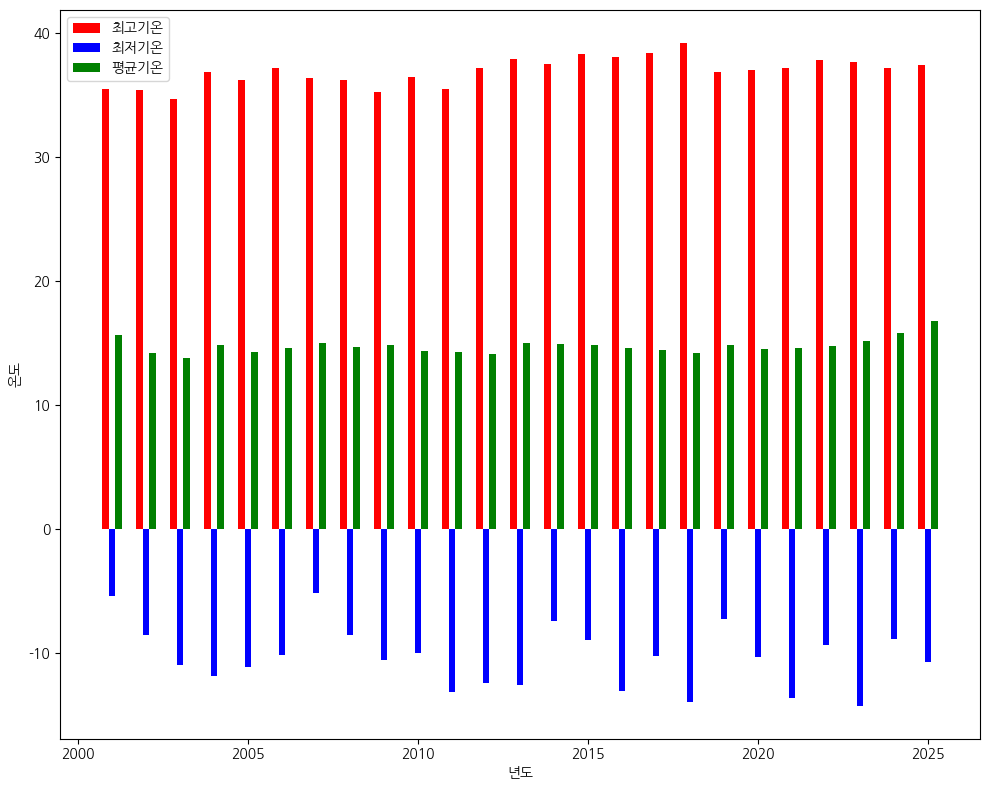

In [195]:
# [문제] 2000~2025년도 최고온도/최저온도/평균온도 변화 시각화

## 내 풀이
## bar 사용
## 2001 / 2002 / .. / 2025 -> .max()
plt.figure(figsize=(10,8))
daeguDF.info()

for i in range(2001,2026):
    every_year_max = daeguDF[daeguDF['날짜'].dt.year == i].max()
    every_year_min = daeguDF[daeguDF['날짜'].dt.year == i].min()
    every_year_mean = daeguDF[daeguDF['날짜'].dt.year == i].mean()

    plt.bar(i-0.2, every_year_max['최고기온(℃)'], color='r', width = 0.2)
    plt.bar(i, every_year_min['최저기온(℃)'], color='b',width = 0.2)
    plt.bar(i+0.2, every_year_mean['평균기온(℃)'], color='g', width = 0.2)

plt.xlabel('년도')
plt.ylabel('온도')
plt.xticks()
plt.legend(['최고기온','최저기온','평균기온'])
plt.tight_layout()
plt.show()


In [202]:
# [문제] 2000~2025년도 최고온도/최저온도/평균온도 변화 시각화
## 강사님 풀이
daeguDF2 = daeguDF.copy()

## df접근자 => 년, 월, 일 추출
daeguDF2['년'] = daeguDF2['날짜'].dt.year
display(daeguDF2.head())

## 그룹화
func_dict = dict(zip(daeguDF2.columns[1:],['mean','min','max']))
display(func_dict)

resultDF = daeguDF2[daeguDF2.columns[1:]].groupby(['년']).agg(func_dict)
resultDF.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),년
0,2001-07-27,28.3,25.9,32.6,2001
1,2001-07-28,29.6,26.6,33.2,2001
2,2001-07-29,31.0,26.3,34.8,2001
3,2001-07-30,29.4,27.3,33.7,2001
4,2001-07-31,29.0,26.9,34.0,2001


{'평균기온(℃)': 'mean', '최저기온(℃)': 'min', '최고기온(℃)': 'max'}

,평균기온(℃),최저기온(℃),최고기온(℃)
년,,,
2001,15.650633,-5.4,35.5
2002,14.192603,-8.5,35.4
2003,13.789041,-10.9,34.7
2004,14.866120,-11.8,36.9
2005,14.270685,-11.1,36.2


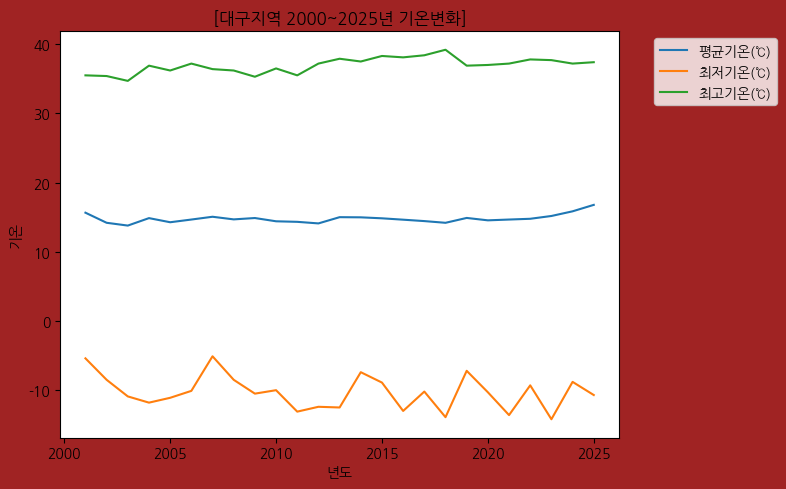

In [197]:
## -> 시각화
plt.figure(figsize=(8,5), facecolor="#a02323")

for col in daeguDF.columns[1:]:
    colDF = resultDF.loc[:, col]
    plt.plot(colDF.index, colDF, label=f'{col}')

plt.legend(bbox_to_anchor=(1.05,1.))
plt.title("[대구지역 2000~2025년 기온변화]")
plt.xlabel('년도')
plt.ylabel('기온')
plt.tight_layout()
plt.show()


In [ ]:

## [과제]여름이 길어지고 겨울이 짧아짐
## 1) 지구온난화 현상 => 다른지역은
## 우선 여름 기준 온도가 몇인지 찾기 => 일평균20도 이상인 일수를 여름이라고 함.
## 그리고 실제로 여름이 길어지고 있는지 확인 하는것
## 데이터는 기간 더 길게....대구지역으로 => 일단은 2001 ~ 2025까지






In [ ]:
# ## [과제] 대구 지역의 인구 / 구별로
# 1) 성별 인구 비율
# 2) 투표 가능 인구
# 3) 학령 인구